## DATA CLEANING CHALLENGE

## Introduction
Data cleaning is the process of spotting and resolving potential data inconsistencies, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. Data Cleaning is an essential part of Data Analysis whose importance cannot be overemphasized as it is vital for proving the quality of Data. Data Cleaning ensures the Accuracy, Completeness, Uniformity and Consistency of the data in order to achieve more precise and useful analytical result.

In this studies, the FIFA 21 v2 dataset with 18979 rows and 77 columns was cleaned using Python.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df1 = pd.read_csv('fifa21 raw data v2.csv', low_memory = False, encoding='UTF-8')
pd.set_option('display.max_columns', None)

In [3]:
#making a copy of the data
df = df1.copy()

In [4]:
#inspecting the data
print(df.shape)
df.head(5)

(18979, 77)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


## Columns Description 
The column description can be found in the data dictionary.

In [5]:
#inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [6]:
#inspecting the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18979.0,226403.384794,27141.054157,41.0,210135.0,232418.0,246922.5,259216.0
Age,18979.0,25.194109,4.710520,16.0,21.0,25.0,29.0,53.0
↓OVA,18979.0,65.718636,6.968999,47.0,61.0,66.0,70.0,93.0
POT,18979.0,71.136414,6.114635,47.0,67.0,71.0,75.0,95.0
BOV,18979.0,66.751726,6.747193,48.0,62.0,67.0,71.0,93.0
Attacking,18979.0,248.938142,74.299428,42.0,222.0,263.0,297.0,437.0
Crossing,18979.0,49.688392,18.131153,6.0,38.0,54.0,63.0,94.0
Finishing,18979.0,45.842405,19.567081,3.0,30.0,49.0,62.0,95.0
Heading Accuracy,18979.0,51.942726,17.294409,5.0,44.0,55.0,64.0,93.0
Short Passing,18979.0,58.768112,14.519106,7.0,54.0,62.0,68.0,94.0


## Major issues

**After Exploration of the data, below are the major issues detected with the data**.

Club: contains irregular characters

Columns to be renamed for easy usage in python.

Height and Weight column to be converted to a unique standard format.

Value, Wage, Release Clause: Contains Euro currency sign (to be removed) and some contains K, M(to be replaced with respective values.)

W/F, SM and IR to be cleaned 

Joined must be datetime dtype

Hits column to be cleaned and transformed into integer

Transform some columns to categorical type

Clean club values

Name: contains irregular sign/irregular characters.

## Changing column names
The column names in the next code contains spaces or invalid characters which makes it difficult to some perform operations (including dot notation) on them in python, they need to be changed to acceptable form

In [7]:
#renaming columns according to best practice
df.columns = df.columns.str.replace(' ', '_') #removing the spaces in between the column names
df.rename(columns = {'↓OVA':'Overall_Rating',
                    'W/F':'WF',
                    'A/W':'AW',
                    'D/W':'DW',
                    'LongName': 'Full_name'}, inplace = True )

## Working on the club column
The club column has some special and irregular characters(\n\n\n\n) before the names of the club and this need to be cleaned. 

In [8]:
##removing the \n\n\n\n before club names
print(f'{df.Club.head()}\n')

df.Club = df.Club.str[4:]

print(f'After cleaning\n {df.Club.head()}')

0           \n\n\n\nFC Barcelona
1               \n\n\n\nJuventus
2        \n\n\n\nAtlético Madrid
3        \n\n\n\nManchester City
4    \n\n\n\nParis Saint-Germain
Name: Club, dtype: object

After cleaning
 0           FC Barcelona
1               Juventus
2        Atlético Madrid
3        Manchester City
4    Paris Saint-Germain
Name: Club, dtype: object


## Manipulating the Height and Weight column
The height and weight columns have similar issues of having different S.I unit in both columns. They both need to be manipulated and converted to a singular unique unit

Height: There is a mixture of cm, ft and inches. for this analysis, all values will be converted to cm

Weight: There is a mixture of kg and lbs, for this analyis, all values will be converted to kg

In [9]:
#Inspecting Height and Weight columns
print(f'Sample values in the Height Column{df.Height.sample(10)}')

df.Height.sample()
print(f'Sample values in the Weight Column')
df.Weight.sample(5)

Sample values in the Height Column5442     186cm
7960     173cm
8366     179cm
13817    186cm
6859     175cm
15730    178cm
1723     178cm
14817    178cm
12482    179cm
14576    175cm
Name: Height, dtype: object
Sample values in the Weight Column


3134     66kg
10833    71kg
7355     69kg
10550    80kg
9438     75kg
Name: Weight, dtype: object

In [10]:
#Changing values to unique format in height(cm)
def change_height(data):
    new_heights = []
    for val in data:
        if str(val).endswith('cm'):
            new_heights.append(val[:-2])
        elif '"' in val:
            value = float(val[0])*12 + float(val[2])
            value = round(value*2.54)
            new_heights.append(value)
        else:
            new_heights.append(val)
    return new_heights

df['Height'] = pd.Series(change_height(df['Height'])).astype('int')

In [11]:
# Changing values to unique for at in weight(kg)
def change_weight(data):
    new_weights = []
    for val in data:
        if str(val).endswith('kg'):
            new_weights.append(val[:-2])
        elif 'lbs' in val:
            value = round(float(val[:3])*0.454)
            new_weights.append(value)
        else:
            new_weights.append(val)
    return new_weights

df['Weight'] = change_weight(df.Weight)

In [12]:
#inspecting the height and weight columns after conversion
print(f'After Manipulatuon:\n')
print(f'Unique values in the Height column: {df.Height.unique()}\n')
print(f'Unique values in the Weight column: {df.Weight.unique()}')

After Manipulatuon:

Unique values in the Height column: [170 187 188 181 175 184 191 178 193 185 199 173 168 176 177 183 180 189
 179 195 172 182 186 192 165 194 167 196 163 190 174 169 171 197 200 166
 164 198 155 201 158 162 161 160 203 157 156 202 159 206]

Unique values in the Weight column: ['72' '83' '87' '70' '68' '80' '71' '91' '73' '85' '92' '69' '84' '96'
 '81' '82' '75' '86' '89' '74' '76' '64' '78' '90' '66' '60' '94' '79'
 '67' '65' '59' '61' '93' '88' '97' '77' '62' '63' '95' '100' '58' 83 81
 78 89 80 84 77 92 76 73 66 59 86 79 67 75 72 87 82 63 70 71 74 '98' '103'
 '99' '102' '56' '101' '57' '55' '104' '107' '110' '53' '50' '54' '52']


## Changing wage, value and Release clause to standard format
The wage, value and release clause columns has similar issues. The € sign, M as million(1000000) and K as thousand(1000) and they need to be transformed. 
The function below will be used for transaformation of the 3 columns

In [13]:
#inspecting the wage,value and release clause columns
print(f'Sample values in the Wage: {df.Wage.sample(5)}\n')
print(f'Sample values in the Value: {df.Value.sample(5)}\n')
print(f'Sample values in the Release_Clause: {df.Release_Clause.sample(5)}')

Sample values in the Wage: 14899     €2K
14311     €2K
13252     €2K
12444    €500
11209     €2K
Name: Wage, dtype: object

Sample values in the Value: 1586      €12M
1352       €6M
11120    €625K
17788    €170K
13428    €550K
Name: Value, dtype: object

Sample values in the Release_Clause: 272      €27.2M
7445      €1.6M
12433     €1.9M
4128      €3.6M
10955       €1M
Name: Release_Clause, dtype: object


In [14]:
def standard_form(data):
    values = []
    for val in data:
        val = val.replace('€', '')
        if 'M' in val:
            value = float(val.split('M')[0])*1000000
            values.append(value)
        elif 'K' in val:
            value = float(val.split('K')[0])*1000
            values.append(value)
        else:
            values.append(val)
    return values     

In [15]:
#applying the defined function on wage, value and release_clause
df['Wage'] = pd.Series(standard_form(df['Wage'])).astype('int')
df['Value'] = pd.Series(standard_form(df['Value'])).astype('int')
df['Release_Clause'] = pd.Series(standard_form(df['Release_Clause'])).astype('int')

In [16]:
#inspecting the wage,value and release clause columns after cleaning
print(f'sample values in the Wage Column: {df.Wage.sample(5)}\n')
print(f'sample values in the  Column: {df.Value.sample(5)}\n')
print(f'sample values in the Release_Clause Column: {df.Release_Clause.sample(5)}')

sample values in the Wage Column: 190      64000
5258      6000
18830      800
6398      3000
1173     41000
Name: Wage, dtype: int32

sample values in the  Column: 2936     3000000
18878     110000
17940     240000
1583           0
18228     160000
Name: Value, dtype: int32

sample values in the Release_Clause Column: 2854     12700000
16726      255000
18672      131000
995      26800000
14815      435000
Name: Release_Clause, dtype: int32


## Droppring the star sign in W/F, SM, IR. 
These 3 columns contain are the player's rating in week foot, skill move and International rating respectively and they contain star sign which needs to be dropped. The columns in addition to Prefered_foot, AM, DW will then be converted to categorical type as they have a maximum of 5 categories between them.

In [17]:
#inspecting the WF, SM, IR columns
print(f'unique values in column WF {df.WF.unique()}\n')
print(f'unique values in column IR {df.IR.unique()}\n')
print(f'unique values in column SM {df.SM.unique()}')

unique values in column WF ['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']

unique values in column IR ['5 ★' '3 ★' '4 ★' '2 ★' '1 ★']

unique values in column SM ['4★' '5★' '1★' '2★' '3★']


In [18]:
def rating(data):
    rate = []
    for val in data:
        val = val[0]
        rate.append(val)
    return rate

In [19]:
#applying the defined function to IR, WF, SM Preferred foot, A/W, D/W
df['WF'] = pd.Series(rating(df['WF'])).astype('category')
df['IR'] = pd.Series(rating(df['IR'])).astype('category')
df['SM'] = pd.Series(rating(df['SM'])).astype('category')
df['Preferred_foot'] = df['Preferred_Foot'].astype('category')
df['AW'] = df['AW'].astype('category')
df['DW'] = df['DW'].astype('category')

In [20]:
#inspecting the WF, SM, IR after cleaning
print(f'After Cleaning\n')
print(f'unique values in column WF {df.WF.unique()}\n')
print(f'unique values in column IR {df.IR.unique()}\n')
print(f'unique values in column SM {df.SM.unique()}')

After Cleaning

unique values in column WF ['4', '3', '5', '2', '1']
Categories (5, object): ['1', '2', '3', '4', '5']

unique values in column IR ['5', '3', '4', '2', '1']
Categories (5, object): ['1', '2', '3', '4', '5']

unique values in column SM ['4', '5', '1', '2', '3']
Categories (5, object): ['1', '2', '3', '4', '5']


## Handling the contract column.
The contract column contains the status of the player, like the contract years, on loan or free agent. This column will be transformed to contract status and will assign active, loan and free to players who still has contract, on loan or free agents respectively.

In [21]:
df['Contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [22]:
def contract_status(data):
    status = []
    for val in data:
        if 'Loan' in val:
            status.append('Loan')
        elif 'Free' in val:
            status.append('Free')
        else:
            status.append('Active')
    return status

#Applying the function to the column
df['Contract_status'] = pd.Series(contract_status(df.Contract)).astype('category')


#dropping the contract status
df.drop(columns = 'Contract', inplace = True)

In [23]:
#Inspecting the column after cleaning:
#inspecting the WF, SM, IR after cleaning
print(f'After Cleaning\n')
print(f'unique values in column WF {df.Contract_status.unique()}')

After Cleaning

unique values in column WF ['Active', 'Loan', 'Free']
Categories (3, object): ['Active', 'Free', 'Loan']


## Checking for Null values
The Hits and Loan_End_Date contains Null values. However, The Nan values in the Hits columns will be filled with Zero while the Loan End Date will be dropped since only few players are on loan and the contract status already classified those players as being on Loan.

In [24]:
for col in df.columns:
    Empty = df[col].isna().sum()
    if Empty != 0:
        print(f'{col} contains {Empty} missing data')

Loan_Date_End contains 17966 missing data
Hits contains 2595 missing data


## Handling the Hits and Loan Date End columns
The hits column refers to the number of times the player's profile has been viewed on the website. Some entries contains 'K'while some contains missing values(000)

In [25]:
#The hits column is cleaned with the code below
df['Hits'] = df['Hits'].astype(str).apply(lambda x: float(x.replace('K', ''))*1000 if 'K' in x else float(x))

#Filling the Nan entries with zero(0)
df['Hits'].fillna(0, inplace = True)

#Converting the column to type int 
df['Hits'] = df['Hits'].astype('int64')

df.drop(columns = 'Loan_Date_End', inplace = True)

## Checking for irregular character in Name Column

In [26]:
#Checking for irregular character in name
# Check for non-alphanumeric characters in a column
for value in df['Name']:
    for char in value:
        if not char.isalnum() and char not in [' ', '.', '-', "'"]:
            print(f"Irregular character '{char}' found in value '{value}'")

Irregular character '�' found in value '�. Radu'
Irregular character '�' found in value '�. Vlădoiu'
Irregular character '�' found in value '�. Târnovanu'
Irregular character '�' found in value '�. Baiaram'
Irregular character '�' found in value '�. Cană'
Irregular character '�' found in value '�. Bodișteanu'
Irregular character '�' found in value '�. Rusu'
Irregular character '­' found in value 'D. Þór­halls­son'
Irregular character '­' found in value 'D. Þór­halls­son'


In [27]:
df[df.Name.str.contains('�')]

,ID,Name,Full_name,photoUrl,playerUrl,Nationality,Age,Overall_Rating,POT,Club,Positions,Height,Weight,Preferred_Foot,BOV,Best_Position,Joined,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,WF,SM,AW,DW,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Preferred_foot,Contract_status
855,165109,�. Radu,Ștefan Radu,https://cdn.sofifa.com/players/165/109/21_60.png,http://sofifa.com/player/165109/stefan-radu/21...,Romania,33,78,78,Lazio,CB,183,79,Left,78,CB,"Jan 1, 2008",6500000,51000,8300000,314,67,55,70,71,51,295,66,45,48,67,69,335,65,58,67,78,67,348,79,62,62,71,74,332,75,85,55,60,57,76,254,84,86,84,52,9,12,12,6,13,1930,410,3,3,Medium,High,2,61,64,65,68,83,69,107,Left,Active
9065,247949,�. Vlădoiu,Ștefan Vlădoiu,https://cdn.sofifa.com/players/247/949/21_60.png,http://sofifa.com/player/247949/stefan-vladoiu...,Romania,21,66,74,Universitatea Craiova,RB,178,72,Right,66,RB,"Jul 1, 2016",1800000,2000,1300000,246,63,35,52,58,38,240,54,43,38,44,61,349,82,75,75,60,57,262,33,58,72,64,35,249,62,60,35,51,41,56,189,63,66,60,40,6,12,6,10,6,1575,353,3,2,Medium,Medium,1,78,35,54,59,62,65,4,Right,Active
14151,248073,�. Târnovanu,Ștefan Târnovanu,https://cdn.sofifa.com/players/248/073/21_60.png,http://sofifa.com/player/248073/stefan-tarnova...,Romania,20,61,75,FCSB (Steaua),GK,197,87,Right,61,GK,"Jan 1, 2020",700000,1000,962000,56,13,8,12,16,7,76,8,11,12,29,16,182,29,35,38,49,31,176,47,37,29,55,8,94,16,11,9,45,13,41,30,8,11,11,307,61,58,63,66,59,921,339,2,1,Medium,Medium,1,61,58,63,59,32,66,8,Right,Active
15238,251880,�. Baiaram,Ștefan Baiaram,https://cdn.sofifa.com/players/251/880/21_60.png,http://sofifa.com/player/251880/stefan-baiaram...,Romania,17,60,79,Universitatea Craiova,LW,185,70,Right,63,RM,"Jul 1, 2019",625000,500,790000,245,56,52,33,60,44,259,63,54,38,47,57,357,80,81,71,63,62,250,53,52,73,33,39,221,52,20,53,54,42,49,93,32,31,30,38,9,9,6,8,6,1463,324,3,3,High,Medium,1,81,49,55,62,29,48,9,Right,Active
16734,248441,�. Cană,Ștefan Cană,https://cdn.sofifa.com/players/248/441/21_60.png,http://sofifa.com/player/248441/stefan-cana/21...,Romania,19,57,72,FCSB (Steaua),CB,180,75,Right,59,CB,"Jan 1, 2019",375000,1000,425000,167,30,19,51,42,25,145,28,21,26,32,38,258,45,56,50,48,59,257,36,78,51,71,21,199,59,54,22,31,33,44,174,58,59,57,63,13,13,14,14,9,1263,266,3,2,Medium,Medium,1,51,24,34,36,57,64,0,Right,Active
17265,258364,�. Bodișteanu,Ștefan Bodișteanu,https://cdn.sofifa.com/players/258/364/21_60.png,http://sofifa.com/player/258364/stefan-bodiste...,Romania,17,56,76,FC Viitorul,"CAM, LW",174,65,Right,58,CAM,"Jul 1, 2019",375000,500,423000,224,43,44,26,59,52,224,54,28,27,53,62,293,73,64,58,51,47,238,41,51,70,32,44,169,15,17,47,58,32,41,80,16,25,39,58,14,14,14,8,8,1286,280,2,2,High,Low,1,68,43,52,56,22,39,0,Right,Active
17671,248421,�. Rusu,Ștefan Rusu,https://cdn.sofifa.com/players/248/421/21_60.png,http://sofifa.com/player/248421/stefan-rusu/21...,Romania,20,55,69,Politehnica Iaşi,CB,182,73,Right,57,CB,"Jul 1, 2019",275000,950,316000,192,38,28,56,43,27,180,35,39,30,32,44,299,63,58,60,46,72,255,40,72,42,74,27,205,53,49,25,37,41,42,160,53,54,53,50,13,7,8,14,8,1341,287,2,2,Medium,Medium,1,60,31,38,43,53,62,0,Right,Active


It can be observed that players with Full name starting with 'Ștefan'(a Romania name) has irregular characters '�'in their Short Name. The irregular character is replaced with 'S' in the code below

In [28]:
df['Name'] = df.Name.str.replace('�', 'S')

#inspecting after Cleaning
df[df.Name.str.contains('�')]

,ID,Name,Full_name,photoUrl,playerUrl,Nationality,Age,Overall_Rating,POT,Club,Positions,Height,Weight,Preferred_Foot,BOV,Best_Position,Joined,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,WF,SM,AW,DW,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Preferred_foot,Contract_status


## Cleaning Whitespace in all columns in the Data

In [29]:
#clean whitespace from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Checking for duplicates

In [30]:
#checking for duplicates.
df[df.duplicated()]

#The data seems to be free of duplicate entries.

,ID,Name,Full_name,photoUrl,playerUrl,Nationality,Age,Overall_Rating,POT,Club,Positions,Height,Weight,Preferred_Foot,BOV,Best_Position,Joined,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,WF,SM,AW,DW,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Preferred_foot,Contract_status


In [31]:
#channging the Joined column to datetime
df['Joined'] = pd.to_datetime(df['Joined'])

#make the joineed column theindex of the dataframe
df.set_index(df['Joined'], inplace = True)

## Outliers
The data contains prospective outliers because the potential and values of some players are far too high compared to others e.g the Value, Wage, Release_Clause of players like Messi, Ronaldo, Neymar, Mbappe, Kevin De Bruyne, Hazard are higher than most of the players. Therefore, Deleting outliers in this case might actually make the data bias. Because, Football analysis is definitely not complete without such players. 

However, Checking the age column there are 3 players whose age (over 40yrs) seems high compared to other players. For a data with over 18,000 observations. Deleting or leaving just 3 observations should not have much effects on the analysis depending on the type of analysis to be done on the data. And since little to no analysis on age will be carried out on the data, it is quite safe to ignore. 

In [32]:
data = df.copy()

**The data seems pretty clean**. 

However, to reduce the dimensionality of the dataset and improve computational efficiency, some columns which are contributors to other columns will be dropped.

Also the position columns could be dropped since there is a column named Best position which is the most preferred poition of the player.

**Breakdown of such columns are highlighted below**:

**Attacking** = **sum**(Crossing	Finishing	Heading Accuracy	Short Passing	Volleys)

**Skill** = **sum**(Dribbling, Curve, FK Accuracy, Long Passing, Ball Control) 

**Movement** = **sum**(Acceleration, Sprint Speed, Agility, Reactions, Balance)

**Power** = **sum**(Shot Power, Jumping, Stamina, Strength, Long Shots)

**Base_Stats** = **sum**(Pace, Shooting, Passing, Dribbling, Defending, and Physicality. ie. (PAC SHO PAS DRI DEF PHY))

**GoalKeeping** = **sum**(GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes)

**Defending** = **sum**(marking, sliding tackle, standing tackle)

**Mentality** = **sum**(Aggression + interception+ positioning+ vision + penalties)

In [33]:
#Rating the summary columns as percentage. These columns are a good representation of the contributors stated above. 
#These summary columns are the key attributes of any football players

data['Attacking'] = data['Attacking'].div(5)
data['Skill'] = data['Skill'].div(5)
data['Movement'] = data['Movement'].div(5)
data['Power'] = data['Power'].div(5)
data['Base_Stats'] = data['Base_Stats'].div(6).round(1)
data['Goalkeeping'] = data['Goalkeeping'].div(5)
data['Defending'] = data['Defending'].div(3).round(1)
data['Mentality'] = data['Mentality'].div(5)

In [34]:
#dropping the contributors
data.drop(columns = ['Crossing', 'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_Passing',
'Ball_Control', 'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance', 'Aggression', 'Interceptions',
'Positioning', 'Vision', 'Penalties', 'Marking', 'Standing_Tackle', 'Sliding_Tackle', 'GK_Diving', 'GK_Handling', 
'GK_Kicking', 'GK_Positioning','GK_Reflexes', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Shot_Power', 'Jumping', 'Stamina',
'Strength', 'Long_Shots', 'Positions'], inplace = True)

In [35]:
print(data.shape)
data.head()

(18979, 37)


,ID,Name,Full_name,photoUrl,playerUrl,Nationality,Age,Overall_Rating,POT,Club,Height,Weight,Preferred_Foot,BOV,Best_Position,Joined,Value,Wage,Release_Clause,Attacking,Skill,Movement,Power,Mentality,Composure,Defending,Goalkeeping,Total_Stats,Base_Stats,WF,SM,AW,DW,IR,Hits,Preferred_foot,Contract_status
Joined,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-07-01,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,170,72,Left,93,RW,2004-07-01,103500000,560000,138400000,85.8,94.0,90.2,77.8,69.4,96,30.3,10.8,2231,77.7,4,4,Medium,Low,5,771,Left,Active
2018-07-10,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,187,83,Right,92,ST,2018-07-10,63000000,220000,75900000,87.4,82.8,86.2,88.8,70.6,95,28.0,11.6,2221,77.3,4,5,High,Low,5,562,Right,Active
2014-07-16,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,188,87,Right,91,GK,2014-07-16,120000000,125000,159400000,19.0,21.8,61.4,53.6,28.0,68,19.0,87.4,1413,81.5,3,1,Medium,Medium,3,150,Right,Active
2015-08-30,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,181,70,Right,91,CAM,2015-08-30,129000000,370000,161000000,81.4,88.2,79.6,81.6,81.6,91,62.0,11.2,2304,80.8,5,4,High,High,4,207,Right,Active
2017-08-03,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,175,68,Right,91,LW,2017-08-03,132000000,270000,166500000,81.6,89.6,90.6,71.4,71.2,93,31.3,11.8,2175,75.2,5,5,High,Medium,5,595,Right,Active


For further analysis sake, both dataframe will be kept depending on the kind of analysis to be done on the data.#

In [36]:
#importing data to csv file
df.to_csv('fifa21_cleaned.csv', index = False)
data.to_csv('fifa21_summary.csv', index = False)

## MACHINE LEARNING MODEL

As a continuation to the project a built a machine learnig model to predict thta value of a player based on certain parameters od feature of the player. This model can be used by 

## Data Exploration

In [37]:
#input = data.drop(columns = 'Value')

In [38]:
data['WF'] = data.WF.astype('category')
data['AW'] = data.AW.astype('category')
data['IR'] = data.IR.astype('category')
data['DW'] = data.DW.astype('category')
data['SM'] = data.SM.astype('category')
df.Best_Position = df.Best_Position.astype('category')
data['Preferred_foot'] = data.Preferred_foot.astype('category')
data['Contract_status'] = data.Contract_status.astype('category')
data.Weight = data.Weight.astype('int64')

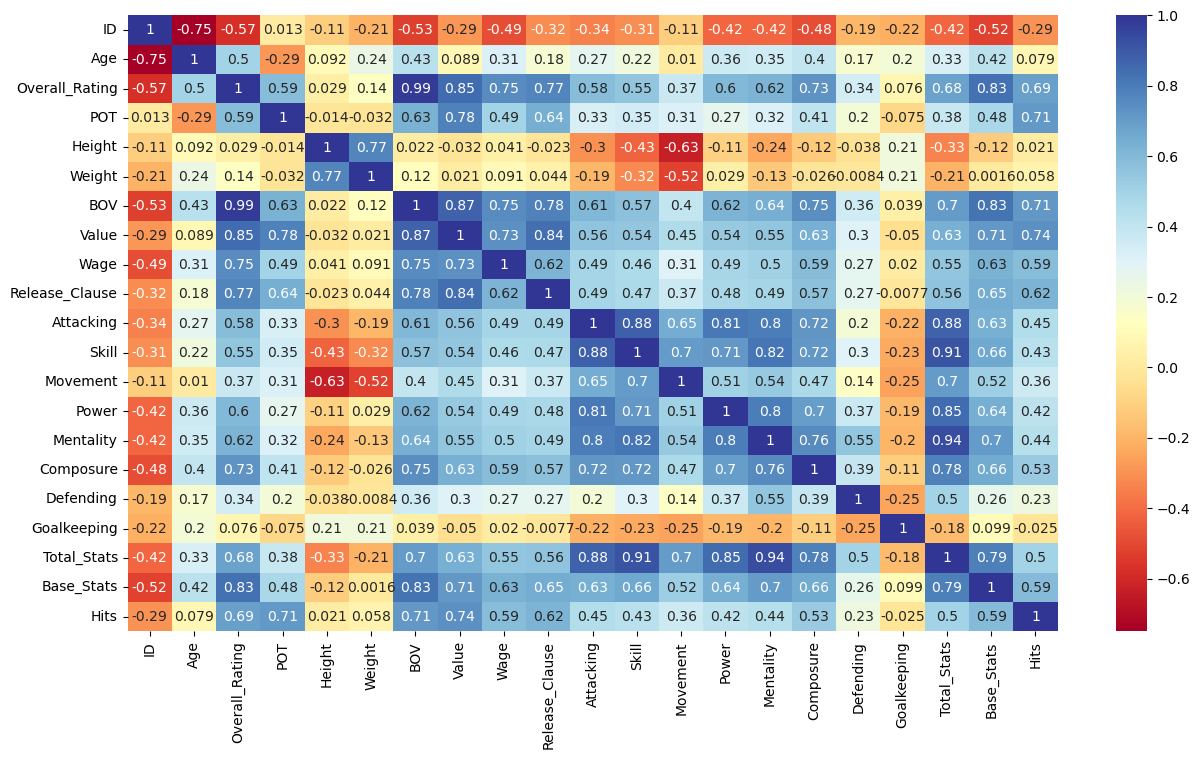

In [39]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(method = 'spearman'), annot = True, cmap = 'RdYlBu')
plt.show()

The heatmap above shows that there are relationships shows some positive relationships within some variables while some are total negative. In All, ID, Weight and Height shows a negative correlation to almost all other variables which is an indication that they are most likely not really necessary for our analysis and ML building. The Correlation between Age and some of the is below 0.5. However, there are some variables that shows strong positive correltaion like:
1. Skill Vs Attacking
2. Release_Clause vs BOV
3. Wage Vs BOV
4. Hits Vs POT
5. Base_stats Vs Overall_Rating
etc

In [40]:
dat = data.copy()
dat.reset_index(drop = True, inplace = True)
input1 = dat.drop(columns = ['Name', 'Age', 'Full_name', 'photoUrl', 'Joined', 'playerUrl', 'Nationality', 'Club', 'Contract_status',\
                            'Weight', 'Height', 'ID', 'Preferred_foot', 'Preferred_Foot'])
input1.head()

,Overall_Rating,POT,BOV,Best_Position,Value,Wage,Release_Clause,Attacking,Skill,Movement,Power,Mentality,Composure,Defending,Goalkeeping,Total_Stats,Base_Stats,WF,SM,AW,DW,IR,Hits
0,93,93,93,RW,103500000,560000,138400000,85.8,94.0,90.2,77.8,69.4,96,30.3,10.8,2231,77.7,4,4,Medium,Low,5,771
1,92,92,92,ST,63000000,220000,75900000,87.4,82.8,86.2,88.8,70.6,95,28.0,11.6,2221,77.3,4,5,High,Low,5,562
2,91,93,91,GK,120000000,125000,159400000,19.0,21.8,61.4,53.6,28.0,68,19.0,87.4,1413,81.5,3,1,Medium,Medium,3,150
3,91,91,91,CAM,129000000,370000,161000000,81.4,88.2,79.6,81.6,81.6,91,62.0,11.2,2304,80.8,5,4,High,High,4,207
4,91,91,91,LW,132000000,270000,166500000,81.6,89.6,90.6,71.4,71.2,93,31.3,11.8,2175,75.2,5,5,High,Medium,5,595


## Dropping More columns
Also the total stats feature is an addition of some columns, to avoid multicolinearity in the model, the columns that sumed up to the total stat will be dropped.

In [41]:
#to verify the above claim
(df.Attacking+df.Defending+df.Skill+df.Mentality+df.Movement+df.Power+df.Goalkeeping).equals(df.Total_Stats) 

True

In [42]:
inputs = input1.copy()
inputs = inputs.drop(columns = ['Attacking', 'Defending', 'Skill', 'Mentality', 'Movement', 'Power', 'Goalkeeping'])
inputs.head()

,Overall_Rating,POT,BOV,Best_Position,Value,Wage,Release_Clause,Composure,Total_Stats,Base_Stats,WF,SM,AW,DW,IR,Hits
0,93,93,93,RW,103500000,560000,138400000,96,2231,77.7,4,4,Medium,Low,5,771
1,92,92,92,ST,63000000,220000,75900000,95,2221,77.3,4,5,High,Low,5,562
2,91,93,91,GK,120000000,125000,159400000,68,1413,81.5,3,1,Medium,Medium,3,150
3,91,91,91,CAM,129000000,370000,161000000,91,2304,80.8,5,4,High,High,4,207
4,91,91,91,LW,132000000,270000,166500000,93,2175,75.2,5,5,High,Medium,5,595


In [43]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Overall_Rating  18979 non-null  int64   
 1   POT             18979 non-null  int64   
 2   BOV             18979 non-null  int64   
 3   Best_Position   18979 non-null  object  
 4   Value           18979 non-null  int64   
 5   Wage            18979 non-null  int64   
 6   Release_Clause  18979 non-null  int64   
 7   Composure       18979 non-null  int64   
 8   Total_Stats     18979 non-null  int64   
 9   Base_Stats      18979 non-null  float64 
 10  WF              18979 non-null  category
 11  SM              18979 non-null  category
 12  AW              18979 non-null  category
 13  DW              18979 non-null  category
 14  IR              18979 non-null  category
 15  Hits            18979 non-null  int64   
dtypes: category(5), float64(1), int64(9), object(1)
memory usa

## Feature Selection

To select the appropriate features for the model, a spearman correlation was used to determine the relationships between the features and the target.
Spearman's rank correlation coefficient is a non-parametric measure of the strength and direction of association between two variables, and it is suitable for both continuous and ordinal categorical data. It is based on the ranking of the values, rather than the actual numerical values, so it can be used when the data does not meet the assumptions of normality required for Pearson's correlation coefficient.

In [44]:
from scipy.stats import spearmanr
def spearman_test(inputs, variable):
    coef, p = spearmanr(inputs[variable], inputs['Value'])
    return coef, p
for i in inputs.columns:
    print(i, spearman_test(inputs, i))

Overall_Rating (0.8477014652622719, 0.0)
POT (0.7817040336517078, 0.0)
BOV (0.8723843874330248, 0.0)
Best_Position (0.005215184083071339, 0.47249607566770635)
Value (0.9999999999999999, 0.0)
Wage (0.7347872698913489, 0.0)
Release_Clause (0.840322921286674, 0.0)
Composure (0.6319810354371206, 0.0)
Total_Stats (0.6349634767909235, 0.0)
Base_Stats (0.7147960122682002, 0.0)
WF (0.21524993991477182, 8.660016441070754e-198)
SM (0.42958817186396325, 0.0)
AW (-0.2053827749226009, 7.129647061311752e-180)
DW (-0.11791374956946152, 9.849244195244443e-60)
IR (0.29788363758526193, 0.0)
Hits (0.7399674565890977, 0.0)


**Observation**: From the above, it can be seen that all the considered variables with the exception of Best_Position has a p_value greater than 0.05 which means they are stasticaly significat to the target variable. However, AW and DW shows a negative correlation and statistically significant p_value. The values were further studied using a Chi2_contigency test. 

In [45]:
from scipy.stats import chi2_contingency

def chi_square_test(inputs, variable):
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[variable], df['Value']))
    return chi2, p

for i in inputs.select_dtypes('category').columns:
    print(i, chi_square_test(inputs, i))

WF (2975.0281478119346, 3.9445356730584444e-191)
SM (11663.900878090612, 0.0)
AW (1619.4218538485754, 4.009304518915603e-116)
DW (1048.3989598623893, 8.844035684287196e-40)
IR (23156.137743085994, 0.0)


The result suggests that the chi-squared test statistic is quite large (1619.42 and 1048.40) and the p-value is very small (4.01e-116 and 8.84e-40) for AW and DW respectively, which means that the probability of obtaining such a large test statistic by chance is very low. Therefore, it is very likely that there is a statistically significant association between the variables and the target. The relationship will be further determined using feature importance after running the model.

In [46]:
#declaring the features and target
feature = inputs.drop(columns = ['Best_Position', 'Value'])
target = inputs.Value

In [47]:
#Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['Overall_Rating', 'POT', 'BOV', 'Wage', 'Release_Clause', 'Composure', 'Total_Stats', 'Base_Stats', \
             'WF', 'SM', 'IR', 'Hits']

scaler = MinMaxScaler()
feature[numerical] = scaler.fit_transform(feature[numerical])

In [48]:
feature.head(3)

,Overall_Rating,POT,BOV,Wage,Release_Clause,Composure,Total_Stats,Base_Stats,WF,SM,AW,DW,IR,Hits
0,1.000000,0.958333,1.000000,1.000000,0.681438,1.000000,0.945825,0.880361,0.75,0.75,Medium,Low,1.0,0.091786
1,0.978261,0.937500,0.977778,0.392857,0.373708,0.988095,0.939452,0.871332,0.75,1.00,High,Low,1.0,0.066905
2,0.956522,0.958333,0.955556,0.223214,0.784835,0.666667,0.424474,0.966140,0.50,0.00,Medium,Medium,0.5,0.017857


In [49]:
# Create dummy variables
feature = pd.get_dummies(feature, drop_first = True)

In [50]:
feature.head(3)

,Overall_Rating,POT,BOV,Wage,Release_Clause,Composure,Total_Stats,Base_Stats,WF,SM,IR,Hits,AW_Low,AW_Medium,DW_Low,DW_Medium
0,1.000000,0.958333,1.000000,1.000000,0.681438,1.000000,0.945825,0.880361,0.75,0.75,1.0,0.091786,0,1,1,0
1,0.978261,0.937500,0.977778,0.392857,0.373708,0.988095,0.939452,0.871332,0.75,1.00,1.0,0.066905,0,0,1,0
2,0.956522,0.958333,0.955556,0.223214,0.784835,0.666667,0.424474,0.966140,0.50,0.00,0.5,0.017857,0,1,0,1


In [51]:
from sklearn.model_selection import train_test_split
X = feature
y = target
# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## HYPERPARAMETER TUNNING AND CROSS VALIDATION

In [52]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit


def find_best_model(x, y):
    algos = [
        {'name': 'linearregression',
         'model': LinearRegression(),
         'params': {'normalize': [True, False]}},
        {'name': 'lasso',
         'model': Lasso(),
         'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}},
        {'name': 'decisiontree',
         'model': DecisionTreeRegressor(),
         'params': {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']}},
        {'name': 'RandomForestRegressor',
         'model': RandomForestRegressor(),
         'params': {'random_state': [42], 'n_estimators': [100, 500]}}
    ]
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for algo in algos:
        gs = GridSearchCV(algo['model'], algo['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo['name'],
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X, y)

,model,best_score,best_params
0,linearregression,0.940476,{'normalize': True}
1,lasso,0.940477,"{'alpha': 2, 'selection': 'cyclic'}"
2,decisiontree,0.964244,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,RandomForestRegressor,0.985146,"{'n_estimators': 500, 'random_state': 42}"


**Observation**: As demonstrated above from the table above, all the machine learning models achieved an impressive R-squared value exceeding 90%. This indicates that the independent variables (X) account for more than 90% of the variability in the dependent variable (y). However, Random Forest performed best with 98% R_squared value.

In [53]:
#best = find_best_model(X, y)

In [54]:
#Running the test sample with Random Forest
reg = RandomForestRegressor(n_estimators = 500, random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.9972868435093831

In [55]:
reg.score(X_test, y_test)

0.9836009265757065

In [56]:
#making predictions with the model
y_pred = reg.predict(X_test)

In [59]:
#creating a table to show the predictive performance of the model.
Performance = y_test.to_frame()
Performance['predict'] = y_pred
Performance['residual'] = Performance['Value'].sub(Performance['predict'])
Performance.rename(columns = {'Value':'Actual'})
Performance.head()

,Value,predict,residual
15455,575000,575100.0,-100.0
6634,1400000,1450600.0,-50600.0
4724,1600000,1391950.0,208050.0
16516,400000,351020.0,48980.0
13697,130000,179350.0,-49350.0


## Evaluating the model performance
The model perfomance will be evaluated using different parameters such as R2, Adjusted R2, RMSE, and residual plot.

In [60]:
#calculating the adj_r2, rmse and r2 value of the model
from sklearn.metrics import mean_squared_error, r2_score

def adj_r2(y_true, y_pred, n_samples, n_features):
    
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adj_r2

# calculate adjusted R-squared value using the test set
adj_R2 = adj_r2(y_test, y_pred, X_test.shape[0], X_test.shape[1])

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# create a dataframe to display the results
results = pd.DataFrame({
    'Metric': ['adj_R2', 'R-squared', 'RMSE'],
    'Value': [adj_R2, r2, rmse]
})

results

,Metric,Value
0,adj_R2,0.983531
1,R-squared,0.983601
2,RMSE,979893.394141


**Observation**: An adjusted R-squared value of 0.983531 and an R-squared value of 0.983601 indicate that the model fits the data well and explains a high proprtion of the variance in the dependent variable. A good model should have a high R-squared value that is close to 1, indicating that the independent variables can explain a large proportion of the variability in the dependent variable. The adjusted R-squared value is a modified version of R-squared that takes into account the number of independent variables used in the model, so a higher adjusted R-squared value observed in the model indicates a better model fit. 

## Regression Plot
A regression plot is a graphical representation of the relationship between two variables, where one variable is the predictor or independent variable and the other variable is the response or dependent variable.

Below is the regression plot for the predicted values for the model against the actual values

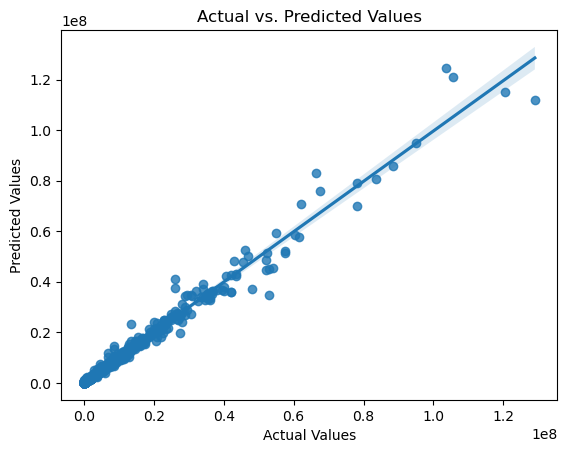

In [61]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

**Observation**: From the plot above, it can be shown that the model performed quite well on the data. As majority of the point fits the regression line. Although, there are some exceptions which are expected. However, a model with a score of 98.35% seems quite good.

## RESIDUAL PLOT
A residual plot is a graph that shows the residuals (difference between observed and predicted values) on the y-axis and the independent variable (or predicted values) on the x-axis. It is used to visualize the performance of a regression model by checking the randomness of the residuals. Ideally, the residuals should be evenly scattered around the horizontal line at zero, indicating that the model is not systematically underestimating or overestimating the target variable. A residual plot can also help identify patterns or trends in the residuals that the model may have missed.

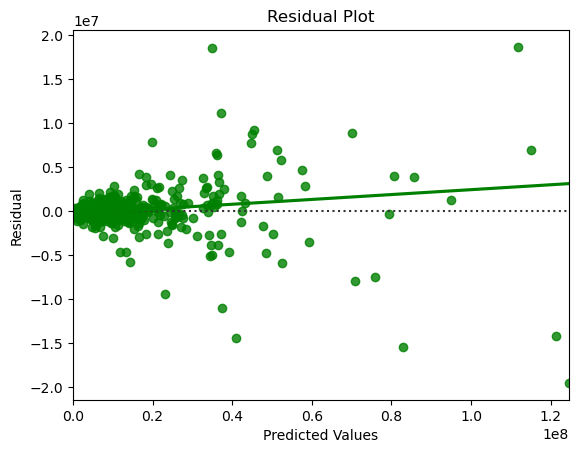

In [62]:
residual = y_test - y_pred

# Create residual plot
sns.residplot(x=y_pred, y=residual, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.show()

**Observation:** From the residual plot above, it was observed that the plot has a high density of points close to the origin(0.0) and a low density of points away from the origin, which is a characteristics of a good model
Also, It is symmetric about the origin(i.e, it assumes a normally distributed curve). 

In [63]:
import pickle
with open('FIFA_21_Value_prediction.pickle', 'wb') as f:
    pickle.dump(reg, f)

## FEATURE IMPORTANCE

In [64]:
reg.feature_importances_
feature_imp = pd.Series(data = reg.feature_importances_, 
                        index = X_train.columns).sort_values(ascending = False)
feature_imp

Release_Clause    0.877941
BOV               0.086842
POT               0.011801
Overall_Rating    0.006340
Wage              0.005131
Hits              0.004701
Base_Stats        0.001590
Total_Stats       0.001481
Composure         0.001177
DW_Low            0.000974
SM                0.000672
IR                0.000506
WF                0.000329
DW_Medium         0.000281
AW_Medium         0.000211
AW_Low            0.000023
dtype: float64